## Data Cleaning

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_inflation = pd.read_csv("Data set for inflation.csv")

df_GDP = pd.read_csv("GLOBAL GDP 1960 - 2021.csv")


In [3]:
df_inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN


In [4]:
# Drop the columns that are irrelevant to the analysis
df_inflation.drop(["Country Code","Indicator Name", "Indicator Code"],inplace = True, axis = 1)
# Rename 'Country Name' column as 'Country' 
df_inflation.rename(columns = {"Country Name": "Country"}, inplace = True)
# Check that the remaining columns are useful to the analysis
df_inflation.columns

Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

In [5]:
# Create a dataframe of just the Sub-Sahara African countries
# Reset the index of the Sub-SaharaAfrican countries dataframe to work with it
Sub_Saharan_Africa = df_inflation.loc[df_inflation['Country'].isin(['Angola','Benin','Burkina Faso','Central African Republic','Cote d\'Ivoire',
'Cameroon','Congo, Dem. Rep.','Congo, Rep.','Djibouti','Ethiopia','Gabon','Ghana','Guinea',
'Guinea-Bissau','Equatorial Guinea','Kenya','Liberia','Lesotho','Madagascar','Mali','Mozambique',
'Mauritania','Mauritius','Malawi','Namibia','Niger','Nigeria','Rwanda','Senegal','Sierra Leone','Somalia','Eswatini','Seychelles',
'Chad','Togo','Tanzania','Sao Tome and Principe','Uganda','South Africa','Zambia','Zimbabwe','Comoros','Cabo Verde','Sudan',
'Eritrea','Gambia, The','Botswana','Burundi','South Sudan',])].copy()
Sub_Saharan_Africa.reset_index(drop=True, inplace=True)
Sub_Saharan_Africa.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
1,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,4.436860,-1.089325,6.057269,...,18.161045,7.937958,4.405352,5.544689,5.557690,16.052535,-2.814698,-0.686772,7.321106,8.404538
2,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.744683,0.428889,-0.548758,0.218786,-0.794050,1.769412,0.644804,-0.705027,3.022721,1.733552
3,Burkina Faso,7.788162,18.562139,1.67591,5.574203,1.845123,-0.730253,2.364106,-4.333754,-0.286714,...,3.818152,0.533739,-0.258090,0.724839,0.441041,1.482999,1.955943,-3.233389,1.884701,3.653268
4,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.536903,5.884607,4.402253,3.062032,2.814958,3.308281,3.238016,2.772864,1.890359,7.240978


In [6]:
# Check the number of African countries in the dataset
print('The number of countries in the Africa dataframe is:',Sub_Saharan_Africa['Country'].value_counts().sum())

# Calculate the number of countries that have null values
print('The number of countries that have null values is:', Sub_Saharan_Africa.isnull().any(axis=1).sum())

The number of countries in the Africa dataframe is: 49
The number of countries that have null values is: 44


In [7]:
df_GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,...,9.730000e+11,9.840000e+11,1.000000e+12,9.240000e+11,8.820000e+11,1.020000e+12,9.910000e+11,9.980000e+11,9.220000e+11,1.080000e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,7.280000e+11,8.210000e+11,8.650000e+11,7.610000e+11,6.910000e+11,6.840000e+11,7.420000e+11,7.950000e+11,7.840000e+11,8.360000e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.250000e+11,1.330000e+11,1.370000e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10


In [8]:
# Drop the columns that are irrelevant to the analysis
df_GDP.drop(["Country Code","Indicator Name", "Indicator Code"],inplace = True, axis = 1)
# Rename 'Country Name' column as 'Country' 
df_GDP.rename(columns = {"Country Name": "Country"}, inplace = True)
# Check that the remaining columns are useful to the analysis
df_GDP.columns

Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

In [9]:
Sub_Saharan_Africa_GDP = df_GDP.loc[df_GDP['Country'].isin(['Angola','Benin','Burkina Faso','Central African Republic','Cote d\'Ivoire',
'Cameroon','Congo, Dem. Rep.','Congo, Rep.','Djibouti','Ethiopia','Gabon','Ghana','Guinea',
'Guinea-Bissau','Equatorial Guinea','Kenya','Liberia','Lesotho','Madagascar','Mali','Mozambique',
'Mauritania','Mauritius','Malawi','Namibia','Niger','Nigeria','Rwanda','Senegal','Sierra Leone','Somalia','Eswatini','Seychelles',
'Chad','Togo','Tanzania','Sao Tome and Principe','Uganda','South Africa','Zambia','Zimbabwe','Comoros','Cabo Verde','Sudan',
'Eritrea','Gambia, The','Botswana','Burundi','South Sudan',])].copy()
Sub_Saharan_Africa_GDP.reset_index(drop=True, inplace=True)
Sub_Saharan_Africa_GDP.head() 

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.250000e+11,1.330000e+11,1.370000e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
1,Burundi,1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,1.654446e+08,1.782971e+08,1.832000e+08,...,2.333341e+09,2.451607e+09,2.705783e+09,3.104004e+09,2.639321e+09,2.712324e+09,2.660124e+09,2.581268e+09,2.780511e+09,2.902029e+09
2,Benin,2.261956e+08,2.356682e+08,2.364349e+08,2.539276e+08,2.698190e+08,2.899087e+08,3.029253e+08,3.062220e+08,3.263231e+08,...,1.114136e+10,1.251785e+10,1.328453e+10,1.138816e+10,1.182107e+10,1.270165e+10,1.426241e+10,1.439169e+10,1.565155e+10,1.778564e+10
3,Burkina Faso,3.304428e+08,3.502472e+08,3.795670e+08,3.940406e+08,4.103216e+08,4.229168e+08,4.338898e+08,4.507540e+08,4.604427e+08,...,1.256102e+10,1.344430e+10,1.394302e+10,1.183216e+10,1.283336e+10,1.410696e+10,1.589007e+10,1.617816e+10,1.793361e+10,1.973762e+10
4,Botswana,3.041231e+07,3.290234e+07,3.564321e+07,3.809115e+07,4.161397e+07,4.579087e+07,5.146444e+07,5.864644e+07,6.624826e+07,...,1.438000e+10,1.490175e+10,1.565466e+10,1.357875e+10,1.508258e+10,1.608844e+10,1.691425e+10,1.669593e+10,1.493007e+10,1.761385e+10


In [10]:
# Check the number of African countries in the dataset
print('The number of countries in the Africa dataframe is:',Sub_Saharan_Africa_GDP['Country'].value_counts().sum())

# Calculate the number of countries that have null values
print('The number of countries that have null values is:', Sub_Saharan_Africa_GDP.isnull().any(axis=1).sum())


The number of countries in the Africa dataframe is: 49
The number of countries that have null values is: 20


The number of countries that have null values in Sub_Saharan_Africa(Inflation rate data) is 44 where that of Sub_Saharan_Africa is 20. To choose the first five largest economies in Sub-Saharan Africa, analysis is done on the GDP data, calculating the average GDP per country and also the average GDP of the entire Sub-Saharan Africa dataframe. Pribably, the null value cells in the dataframe would be filled the average of the Sub-Saharan Africa dataframe.

In [11]:
# First, transpose the Sub_Saharan_Africa_GDP dataframe to have the countries as columns. This will help us plot a bar graph of the average GDP.
Sub_Saharan_Africa_GDP_tr = Sub_Saharan_Africa_GDP.T
Sub_Saharan_Africa_GDP_tr.columns = Sub_Saharan_Africa_GDP_tr.iloc[0]
Sub_Saharan_Africa_GDP_tr = Sub_Saharan_Africa_GDP_tr.drop(index='Country')
Sub_Saharan_Africa_GDP_tr.reset_index(inplace=True)
Sub_Saharan_Africa_GDP_tr = Sub_Saharan_Africa_GDP_tr.rename(columns= {'index':'Year'})

In [12]:
#The series extraction of the Average GDP of the Countries
Average_GDP = Sub_Saharan_Africa_GDP_tr.mean(axis='index', skipna = True)


In [13]:
#Change series to dataframe and renaming the column
Average_GDP_df = Average_GDP.to_frame(name = "Average")
Average_GDP_df.head()

,Average
Country,
Year,3.161607e+245
Angola,3.803637e+10
Burundi,1.115751e+09
Benin,4.260835e+09
Burkina Faso,4.696434e+09


In [15]:
# drop the year row
Average_GDP_df.drop("Year", inplace = True, axis = 0)

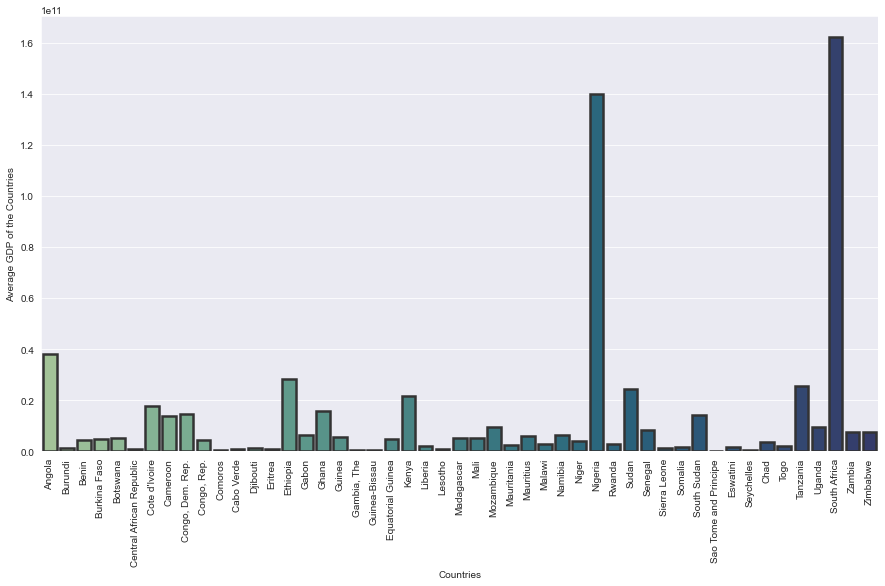

In [16]:
# Plot a graph of all missing values
plt.rcParams.update({'font.size': 10})
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.dark_palette("#69d", reverse=True, as_cmap=True)
ax = sns.barplot(x= Average_GDP_df.index, y=Average_GDP_df["Average"],linewidth=2.5, edgecolor=".2",palette='crest')


plt.xlabel("Countries")
plt.ylabel("Average GDP of the Countries")
plt.show()

From the figure above, we will consider five largest economies of the Sub Saharan Africa. These Countries include South Africa, Nigeria, Angola, Ethopia and Tanzania.

## Descriptive and Comparative Analysis

In [17]:
# Create a dataframe of just the five largest Sub-Saharan African economies using the Inflation rate.
# Reset the index of the African countries dataframe to work with it
Sub_Saharan_Africa_Inflation = Sub_Saharan_Africa.loc[Sub_Saharan_Africa['Country'].isin(['Angola','Ethiopia','Nigeria','Tanzania','South Africa',])].copy()
Sub_Saharan_Africa_Inflation.reset_index(drop=True, inplace=True)
Sub_Saharan_Africa_Inflation.head() 

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
1,Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,-1.361868,0.808679,0.182613,...,23.600418,7.464022,6.890020,9.568900,6.628133,10.687115,13.833036,15.809632,20.356347,26.839522
2,Nigeria,5.444327,6.279147,5.265632,-2.694655,0.856793,4.103459,9.690346,-3.726337,-0.476059,...,12.217782,8.475827,8.062486,9.009387,15.675341,16.523540,12.094732,11.396795,13.246023,16.952846
3,Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,9.777015,12.187500,15.598886,...,16.001094,7.870724,6.131614,5.588170,5.174766,5.318716,3.494458,3.464281,3.290291,NaN
4,South Africa,1.288859,2.102374,1.246285,1.337970,2.534973,4.069029,3.489234,3.538992,1.986136,...,5.724658,5.784469,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672


In [22]:
# Create a dataframe of just the five largest Sub-Saharan African economies using the GDP data.
# Reset the index of the African countries dataframe to work with it
Sub_Saharan_Africa_GDP_five = Sub_Saharan_Africa_GDP.loc[Sub_Saharan_Africa_GDP['Country'].isin(['Angola','Ethiopia','Nigeria','Tanzania','South Africa',])].copy()
Sub_Saharan_Africa_GDP_five.reset_index(drop=True, inplace=True)
Sub_Saharan_Africa_GDP_five 

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.250000e+11,1.330000e+11,1.370000e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
1,Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.331072e+10,4.764821e+10,5.561223e+10,6.458933e+10,7.429662e+10,8.177079e+10,8.426935e+10,9.591259e+10,1.080000e+11,1.110000e+11
2,Nigeria,4.196092e+09,4.467200e+09,4.909303e+09,5.165489e+09,5.552822e+09,5.874423e+09,6.366793e+09,5.203136e+09,5.200896e+09,...,4.560000e+11,5.090000e+11,5.470000e+11,4.870000e+11,4.050000e+11,3.760000e+11,3.970000e+11,4.480000e+11,4.320000e+11,4.410000e+11
3,Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.965053e+10,4.568053e+10,4.996479e+10,4.737860e+10,4.977402e+10,5.332063e+10,5.700371e+10,6.113687e+10,6.240971e+10,6.777510e+10
4,South Africa,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,...,4.340000e+11,4.010000e+11,3.810000e+11,3.470000e+11,3.240000e+11,3.810000e+11,4.050000e+11,3.880000e+11,3.350000e+11,4.200000e+11


In [23]:
# First, transpose the Sub_Saharan_Africa_Inflation rate dataframe to have the countries as columns. 
Sub_Saharan_Africa_Inflation_tr = Sub_Saharan_Africa_Inflation.T
Sub_Saharan_Africa_Inflation_tr.columns = Sub_Saharan_Africa_Inflation_tr.iloc[0]
Sub_Saharan_Africa_Inflation_tr = Sub_Saharan_Africa_Inflation_tr.drop(index='Country')
Sub_Saharan_Africa_Inflation_tr.reset_index(inplace=True)
Sub_Saharan_Africa_Inflation_tr = Sub_Saharan_Africa_Inflation_tr.rename(columns= {'index':'Year'})





# First, transpose the Sub_Saharan_Africa_GDP_five dataframe to have the countries as columns. 
Sub_Saharan_Africa_GDP_five_tr = Sub_Saharan_Africa_GDP_five.T
Sub_Saharan_Africa_GDP_five_tr.columns = Sub_Saharan_Africa_GDP_five_tr.iloc[0]
Sub_Saharan_Africa_GDP_five_tr = Sub_Saharan_Africa_GDP_five_tr.drop(index='Country')
Sub_Saharan_Africa_GDP_five_tr.reset_index(inplace=True)
Sub_Saharan_Africa_GDP_five_tr = Sub_Saharan_Africa_GDP_five_tr.rename(columns= {'index':'Year'})

Among these five countries, it is only Nigeria and South Africa that have a consistent data without null values within the scope of this study.

In [24]:
Sub_Saharan_Africa_GDP_five_tr.head()

Country,Year,Angola,Ethiopia,Nigeria,Tanzania,South Africa
0,1960,NaN,NaN,4196092258.0,NaN,8748596504.0
1,1961,NaN,NaN,4467200336.0,NaN,9225996313.0
2,1962,NaN,NaN,4909302954.0,NaN,9813996079.0
3,1963,NaN,NaN,5165489010.0,NaN,10854195663.0
4,1964,NaN,NaN,5552822484.0,NaN,11955995223.0


In [25]:
Sub_Saharan_Africa_Inflation_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          62 non-null     object
 1   Angola        29 non-null     object
 2   Ethiopia      56 non-null     object
 3   Nigeria       62 non-null     object
 4   Tanzania      55 non-null     object
 5   South Africa  62 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


In [29]:
#Change year from string datatype to datetime
Sub_Saharan_Africa_GDP_five_tr['Year']= pd.to_datetime(Sub_Saharan_Africa_GDP_five_tr['Year'])
Sub_Saharan_Africa_Inflation_tr['Year'] = pd.to_datetime(Sub_Saharan_Africa_Inflation_tr['Year'])

In [30]:
Sub_Saharan_Africa_GDP_five_tr

Country,Year,Angola,Ethiopia,Nigeria,Tanzania,South Africa
0,1960-01-01,NaN,NaN,4196092258.0,NaN,8748596504.0
1,1961-01-01,NaN,NaN,4467200336.0,NaN,9225996313.0
2,1962-01-01,NaN,NaN,4909302954.0,NaN,9813996079.0
3,1963-01-01,NaN,NaN,5165489010.0,NaN,10854195663.0
4,1964-01-01,NaN,NaN,5552822484.0,NaN,11955995223.0
...,...,...,...,...,...,...
57,2017-01-01,68972763787.0,81770791971.0,376000000000.0,53320625959.0,381000000000.0
58,2018-01-01,77792940077.0,84269348327.0,397000000000.0,57003713611.0,405000000000.0
59,2019-01-01,69309104807.0,95912590628.0,448000000000.0,61136873692.0,388000000000.0
60,2020-01-01,53619071176.0,108000000000.0,432000000000.0,62409709111.0,335000000000.0


In [31]:
Sub_Saharan_Africa_Inflation_tr

Country,Year,Angola,Ethiopia,Nigeria,Tanzania,South Africa
0,1960-01-01,NaN,NaN,5.444327,NaN,1.288859
1,1961-01-01,NaN,NaN,6.279147,NaN,2.102374
2,1962-01-01,NaN,NaN,5.265632,NaN,1.246285
3,1963-01-01,NaN,NaN,-2.694655,NaN,1.33797
4,1964-01-01,NaN,NaN,0.856793,NaN,2.534973
...,...,...,...,...,...,...
57,2017-01-01,29.843587,10.687115,16.52354,5.318716,5.184247
58,2018-01-01,19.628608,13.833036,12.094732,3.494458,4.517165
59,2019-01-01,17.081215,15.809632,11.396795,3.464281,4.120246
60,2020-01-01,NaN,20.356347,13.246023,3.290291,3.210036


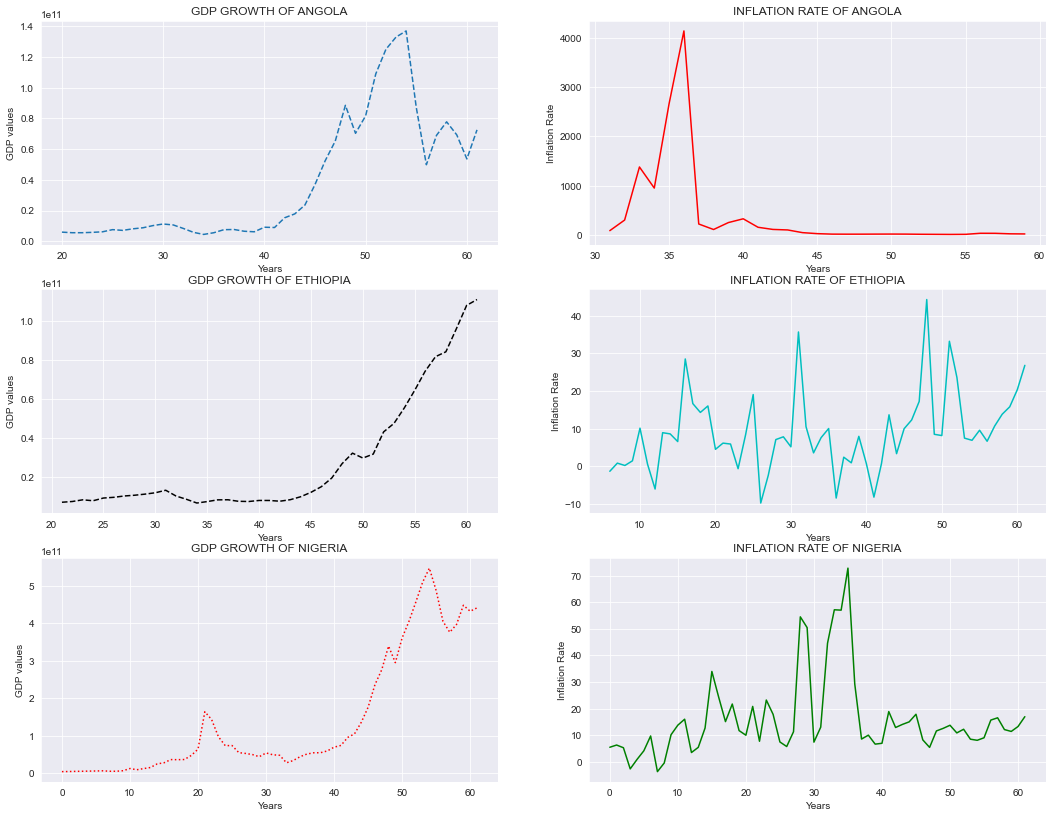

In [32]:
#comparison of the inflation rate and GDP growth in different countries
fig = plt.figure(figsize = (18,14))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
_=ax1.plot(Sub_Saharan_Africa_GDP_five_tr.index,Sub_Saharan_Africa_GDP_five_tr.Angola, '--')
ax1.set_xlabel('Years')
ax1.set_ylabel('GDP values')
ax1.set_title('GDP GROWTH OF ANGOLA')
_=ax2.plot(Sub_Saharan_Africa_Inflation_tr.index,Sub_Saharan_Africa_Inflation_tr.Angola, 'r')
ax2.set_xlabel('Years')
ax2.set_ylabel('Inflation Rate')
ax2.set_title('INFLATION RATE OF ANGOLA')
_=ax3.plot(Sub_Saharan_Africa_GDP_five_tr.index,Sub_Saharan_Africa_GDP_five_tr.Ethiopia, 'k--')
ax3.set_xlabel('Years')
ax3.set_ylabel('GDP values')
ax3.set_title('GDP GROWTH OF ETHIOPIA')
_=ax4.plot(Sub_Saharan_Africa_Inflation_tr.index,Sub_Saharan_Africa_Inflation_tr.Ethiopia, 'c')
ax4.set_xlabel('Years')
ax4.set_ylabel('Inflation Rate')
ax4.set_title('INFLATION RATE OF ETHIOPIA')
_=ax5.plot(Sub_Saharan_Africa_GDP_five_tr.index,Sub_Saharan_Africa_GDP_five_tr.Nigeria, ':r')
ax5.set_xlabel('Years')
ax5.set_ylabel('GDP values')
ax5.set_title('GDP GROWTH OF NIGERIA')
_=ax6.plot(Sub_Saharan_Africa_Inflation_tr.index,Sub_Saharan_Africa_Inflation_tr.Nigeria, 'g')
ax6.set_xlabel('Years')
ax6.set_ylabel('Inflation Rate')
ax6.set_title('INFLATION RATE OF NIGERIA')
plt.show()


In [34]:
Sub_Saharan_Africa_Inflation_tr.rename(columns ={"South Africa": "Southafrica"}, inplace = True)


Sub_Saharan_Africa_GDP_five_tr.rename(columns ={"South Africa": "Southafrica"}, inplace = True)


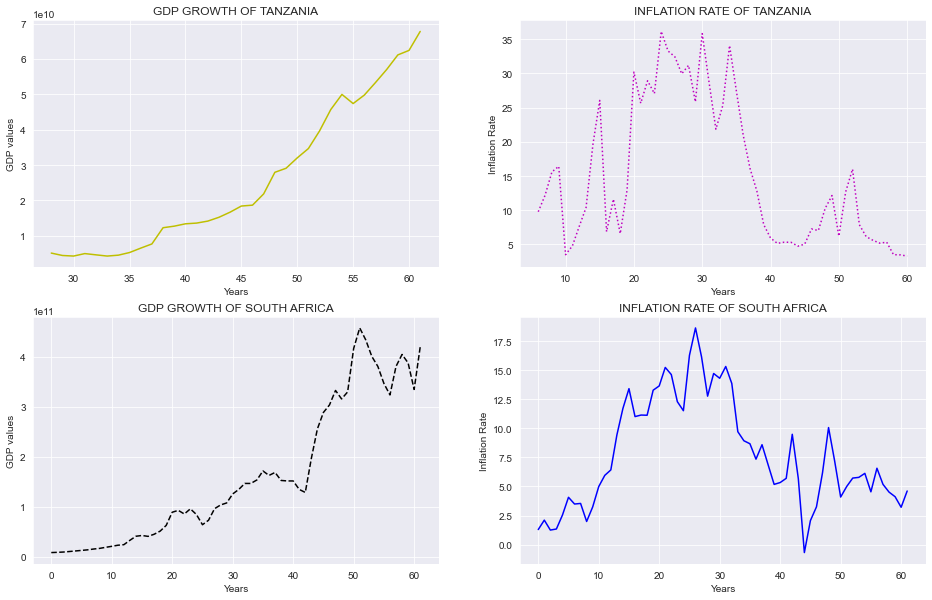

In [35]:
#comparison of the inflation rate and GDP growth in different countries
fig = plt.figure(figsize = (16,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
_=ax1.plot(Sub_Saharan_Africa_GDP_five_tr.index,Sub_Saharan_Africa_GDP_five_tr.Tanzania, 'y-')
ax1.set_xlabel('Years')
ax1.set_ylabel('GDP values')
ax1.set_title('GDP GROWTH OF TANZANIA')
_=ax2.plot(Sub_Saharan_Africa_Inflation_tr.index,Sub_Saharan_Africa_Inflation_tr.Tanzania, ':m')
ax2.set_xlabel('Years')
ax2.set_ylabel('Inflation Rate')
ax2.set_title('INFLATION RATE OF TANZANIA')
_=ax3.plot(Sub_Saharan_Africa_GDP_five_tr.index,Sub_Saharan_Africa_GDP_five_tr.Southafrica, 'k--')
ax3.set_xlabel('Years')
ax3.set_ylabel('GDP values')
ax3.set_title('GDP GROWTH OF SOUTH AFRICA')
_=ax4.plot(Sub_Saharan_Africa_Inflation_tr.index,Sub_Saharan_Africa_Inflation_tr.Southafrica, 'b')
ax4.set_xlabel('Years')
ax4.set_ylabel('Inflation Rate')
ax4.set_title('INFLATION RATE OF SOUTH AFRICA')
plt.show()

The countries all had there worst hit of inflation rate different times Angola was beteween 1990 and 2000, Ethiopia, between 2000 and 2010, Nigeria between 1990 and 2000, Tanzania between 1980 and 1990, and South Africa was between 1980 and 1990.
- Compare High inflation rate with low GDP growth.
- Compare low inflation rate with high GDP growth.
- Is there any time lag between rise in inflation and response to GDP growth.